## Modeling Section


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import random
import os
#load python packages

import datetime
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics

In [2]:
df = pd.read_csv('BigMartModelData.csv')
pd.options.display.max_columns = None

In [3]:
X_drop = df.drop(['Delivery_Coded', 'Category_Name', 'Customer_State', 'Customer_Zipcode','Order_City','Order_Country','Order_State','Order_Status'], axis = 1)
X_dev = pd.get_dummies(X_drop, columns = ['Delivery_Status', 'Shipping_Mode'])
# One-hot encode all features in training set.
#X = pd.get_dummies(X_dev)

X_dev

,Unnamed: 0,Actual_Ship_Days,Scheduled_Days_Ship,Late_delivery_risk,Category_Id,Order_Region_Caribbean,Order_Region_Central Africa,Order_Region_Central America,Order_Region_Central Asia,Order_Region_East Africa,Order_Region_East of USA,Order_Region_Eastern Asia,Order_Region_Eastern Europe,Order_Region_North Africa,Order_Region_Northern Europe,Order_Region_Oceania,Order_Region_South America,Order_Region_South Asia,Order_Region_South of USA,Order_Region_Southeast Asia,Order_Region_Southern Africa,Order_Region_Southern Europe,Order_Region_US Center,Order_Region_West Africa,Order_Region_West Asia,Order_Region_West of USA,Order_Region_Western Europe,Delivery_Status_Advance shipping,Delivery_Status_Late delivery,Delivery_Status_Shipping on time,Shipping_Mode_First Class,Shipping_Mode_Same Day,Shipping_Mode_Second Class,Shipping_Mode_Standard Class
0,0,3,4,0,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,3,3,4,0,73,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,6,2,1,1,73,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,13,2,1,1,73,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,15,2,1,1,73,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59486,180500,3,4,0,45,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
59487,180505,2,4,0,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
59488,180508,4,2,1,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
59489,180512,6,4,1,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [4]:
# Split the data
y = df['Delivery_Coded'].values.tolist()


X = X_dev.values.tolist()

features = ['Category_Name', 'Customer_State',
       'Customer_Zipcode', 'Order_City', 'Order_Country', 'Order_State',
       'Shipping_Mode', 'Order_Status','Delivery_Status','Delivery_Coded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



In [5]:
class_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)

In [6]:
class_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
class_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [7]:
X_dev.columns

Index(['Unnamed: 0', 'Actual_Ship_Days', 'Scheduled_Days_Ship',
       'Late_delivery_risk', 'Category_Id', 'Order_Region_Caribbean',
       'Order_Region_Central Africa', 'Order_Region_Central America',
       'Order_Region_Central Asia', 'Order_Region_East Africa',
       'Order_Region_East of USA', 'Order_Region_Eastern Asia',
       'Order_Region_Eastern Europe', 'Order_Region_North Africa',
       'Order_Region_Northern Europe', 'Order_Region_Oceania',
       'Order_Region_South America', 'Order_Region_South Asia',
       'Order_Region_South of  USA ', 'Order_Region_Southeast Asia',
       'Order_Region_Southern Africa', 'Order_Region_Southern Europe',
       'Order_Region_US Center ', 'Order_Region_West Africa',
       'Order_Region_West Asia', 'Order_Region_West of USA ',
       'Order_Region_Western Europe', 'Delivery_Status_Advance shipping',
       'Delivery_Status_Late delivery', 'Delivery_Status_Shipping on time',
       'Shipping_Mode_First Class', 'Shipping_Mode_Same Day'

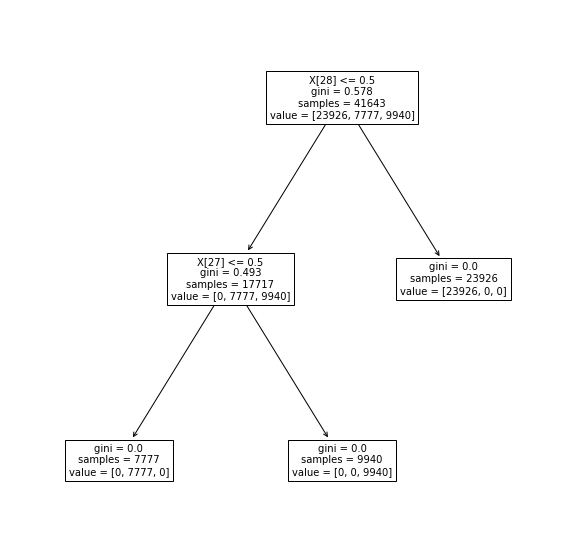

In [8]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(class_tree, fontsize=10)
plt.show()

In [9]:
# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = class_tree.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
pd.Series(y_pred)

0        2
1        0
2        2
3        2
4        0
        ..
17843    0
17844    0
17845    0
17846    1
17847    0
Length: 17848, dtype: int32

In [10]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, average = 'macro'))
#print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, average = 'macro'))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, average = 'macro'))
#print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, average = 'macro'))

Model Entropy - no max depth
Accuracy: 1.0
Balanced accuracy: 1.0
Precision score for "Yes" 1.0
Recall score for "Yes" 1.0


## RandomForest Setup

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [12]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(random_state = 1234, max_depth = 3)

# Model and fit
firstRFModel.fit(X_train, y_train)

y_pred = firstRFModel.predict(X_test)

pd.Series(y_pred)

0        2
1        0
2        2
3        2
4        0
        ..
17843    0
17844    0
17845    0
17846    1
17847    0
Length: 17848, dtype: int32

In [13]:
print("Random Forest  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, average = 'weighted', pos_label = "Yes"))
print('Recall score' , metrics.recall_score(y_test,y_pred, average = 'weighted', pos_label = "No"))

Random Forest  model - max depth 3
Accuracy: 1.0
Balanced accuracy: 1.0
Precision score 1.0
Recall score 1.0


O:\Users\Joe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
O:\Users\Joe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'No') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Feature Importance Plot

In [14]:

names = []
importances = []
for name, importance in zip(X_dev.columns, firstRFModel.feature_importances_):
    print(name, '=', importance)
    names.append(name)
    importances.append(importance)
  

Unnamed: 0 = 0.0023183160957356013
Actual_Ship_Days = 0.12685895333110506
Scheduled_Days_Ship = 0.033079972988692675
Late_delivery_risk = 0.2513454998604582
Category_Id = 6.793218042031424e-05
Order_Region_Caribbean = 3.2859812098789676e-05
Order_Region_Central Africa = 1.2966732431712242e-05
Order_Region_Central America = 1.2270980313046967e-05
Order_Region_Central Asia = 0.0
Order_Region_East Africa = 1.4287301643259938e-05
Order_Region_East of USA = 8.673781112198721e-05
Order_Region_Eastern Asia = 0.0
Order_Region_Eastern Europe = 1.221192355786819e-06
Order_Region_North Africa = 1.924162053124199e-05
Order_Region_Northern Europe = 1.8768754128164317e-06
Order_Region_Oceania = 2.9905498118300875e-05
Order_Region_South America = 6.190238526911565e-06
Order_Region_South Asia = 1.2679638843470678e-05
Order_Region_South of  USA  = 4.525752192561149e-05
Order_Region_Southeast Asia = 6.493685010471227e-06
Order_Region_Southern Africa = 0.0
Order_Region_Southern Europe = 1.431293043272192

<BarContainer object of 34 artists>

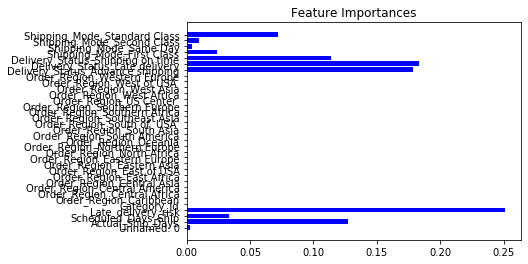

In [15]:
plt.title('Feature Importances')
plt.barh(names, importances, color = 'b', align = 'center')


In [42]:
names


['Unnamed: 0',
 'Actual_Ship_Days',
 'Scheduled_Days_Ship',
 'Late_delivery_risk',
 'Category_Id',
 'Order_Region_Caribbean',
 'Order_Region_Central Africa',
 'Order_Region_Central America',
 'Order_Region_Central Asia',
 'Order_Region_East Africa',
 'Order_Region_East of USA',
 'Order_Region_Eastern Asia',
 'Order_Region_Eastern Europe',
 'Order_Region_North Africa',
 'Order_Region_Northern Europe',
 'Order_Region_Oceania',
 'Order_Region_South America',
 'Order_Region_South Asia',
 'Order_Region_South of  USA ',
 'Order_Region_Southeast Asia',
 'Order_Region_Southern Africa',
 'Order_Region_Southern Europe',
 'Order_Region_US Center ',
 'Order_Region_West Africa',
 'Order_Region_West Asia',
 'Order_Region_West of USA ',
 'Order_Region_Western Europe',
 'Delivery_Status_Advance shipping',
 'Delivery_Status_Late delivery',
 'Delivery_Status_Shipping on time',
 'Shipping_Mode_First Class',
 'Shipping_Mode_Same Day',
 'Shipping_Mode_Second Class',
 'Shipping_Mode_Standard Class']

## Appears the Order Regions are irrelevant features for this show.


In [16]:
X_dev = X_dev.drop([ 'Order_Region_Caribbean',
 'Order_Region_Central Africa',
 'Order_Region_Central America',
 'Order_Region_Central Asia',
 'Order_Region_East Africa',
 'Order_Region_East of USA',
 'Order_Region_Eastern Asia',
 'Order_Region_Eastern Europe',
 'Order_Region_North Africa',
 'Order_Region_Northern Europe',
 'Order_Region_Oceania',
 'Order_Region_South America',
 'Order_Region_South Asia',
 'Order_Region_South of  USA ',
 'Order_Region_Southeast Asia',
 'Order_Region_Southern Africa',
 'Order_Region_Southern Europe',
 'Order_Region_US Center ',
 'Order_Region_West Africa',
 'Order_Region_West Asia',
 'Order_Region_West of USA ',
 'Order_Region_Western Europe'], axis = 1)

In [18]:
#X_dev = X_dev.drop(['Delivery_Status_Advance shipping', 'Delivery_Status_Late delivery','Delivery_Status_Shipping on time'], axis = 1)
#X_dev = X_dev.drop(['Delivery_Status_Late delivery','Delivery_Status_Shipping on time'], axis = 1)
X_tre = X_dev.drop(['Late_delivery_risk'], axis = 1)
X_tre

,Unnamed: 0,Actual_Ship_Days,Scheduled_Days_Ship,Category_Id,Shipping_Mode_First Class,Shipping_Mode_Same Day,Shipping_Mode_Second Class,Shipping_Mode_Standard Class
0,0,3,4,73,0,0,0,1
1,3,3,4,73,0,0,0,1
2,6,2,1,73,1,0,0,0
3,13,2,1,73,1,0,0,0
4,15,2,1,73,1,0,0,0
...,...,...,...,...,...,...,...,...
59486,180500,3,4,45,0,0,0,1
59487,180505,2,4,45,0,0,0,1
59488,180508,4,2,45,0,0,1,0
59489,180512,6,4,45,0,0,0,1


## Let's do this again - split and train

In [19]:
# Split the data
y = df['Delivery_Coded'].values.tolist()


X = X_tre.values.tolist()

features = ['Category_Name', 'Customer_State',
       'Customer_Zipcode', 'Order_City', 'Order_Country', 'Order_State',
       'Shipping_Mode', 'Order_Status','Delivery_Status','Delivery_Coded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



## Decision Tree

In [20]:
class_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
class_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

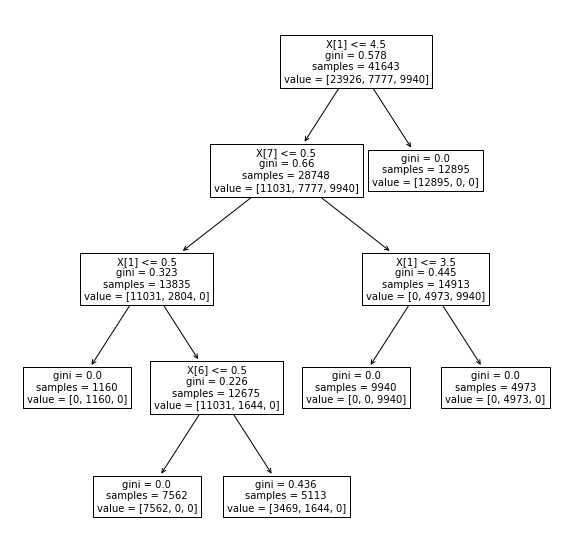

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(class_tree, fontsize=10)
plt.show()

In [22]:
# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = class_tree.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
pd.Series(y_pred)

0        2
1        0
2        2
3        2
4        0
        ..
17843    0
17844    0
17845    0
17846    1
17847    0
Length: 17848, dtype: int32

In [23]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, average = 'macro'))
#print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, average = 'macro'))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, average = 'macro'))
#print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, average = 'macro'))

Model Entropy - no max depth
Accuracy: 0.9602196324518153
Balanced accuracy: 0.9299595541087107
Precision score for "Yes" 0.9784515463291754
Recall score for "Yes" 0.9299595541087107


## RandomForest Repeat

In [26]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(random_state = 1234, max_depth = 3)

# Model and fit
firstRFModel.fit(X_train, y_train)

y_pred = firstRFModel.predict(X_test)

pd.Series(y_pred)

0        2
1        0
2        2
3        2
4        0
        ..
17843    0
17844    0
17845    0
17846    2
17847    0
Length: 17848, dtype: int32

In [27]:
print("Random Forest  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, average = 'weighted', pos_label = "Yes"))
print('Recall score' , metrics.recall_score(y_test,y_pred, average = 'weighted', pos_label = "No"))

Random Forest  model - max depth 3
Accuracy: 0.8885589421783954
Balanced accuracy: 0.80378810298905
Precision score 0.9078710191960496
Recall score 0.8885589421783954


O:\Users\Joe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
O:\Users\Joe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'No') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lreg = LogisticRegression(max_iter = 10000)
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)

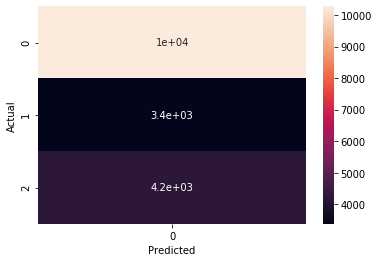

In [30]:
confusion_matrix = pd.crosstab(np.array(y_test), np.array( y_pred), rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [31]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
#print('Precision: ' , metrics.precision_score(y_test,y_pred, average = 'macro'))
#print('Recall: ' , metrics.recall_score(y_test,y_pred, average = 'macro'))
plt.show()

Accuracy:  0.5755826983415508


In [ ]:
## Check Feature Importance again.
names = []
importances = []
for name, importance in zip(X_dev.columns, firstRFModel.feature_importances_):
    print(name, '=', importance)
    names.append(name)
    importances.append(importance)